In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('transactions_train.csv')
responseVar = data.isFraud.to_numpy()
responseVar
data['deltaBalanceDest'] = data.newbalanceDest - data.oldbalanceDest
y = pd.get_dummies(data.type,prefix='type')
data = pd.concat([data,y],axis=1)
data['prevStep'] = data['step'].shift(1)
data.loc[0,'prevStep'] = 0

In [6]:
features = data.loc[:,['amount','deltaBalanceDest','step','prevStep','type_CASH_IN',
                      'type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER',
                      'oldbalanceOrig','newbalanceOrig','newbalanceDest','oldbalanceDest']]
features['deltaBalanceDest'] = features['deltaBalanceDest'] * -1.0

#features = data.loc[:,['amount','deltaBalanceDest','step','prevStep','oldbalanceOrig']]

In [7]:
Xtrain,Xtest,ytrain,ytest = train_test_split(features,responseVar,test_size=0.2,stratify=responseVar)

In [136]:
mdl = AdaBoostClassifier(n_estimators=300)
#mdl = RandomForestClassifier(max_depth=5, n_estimators=100, n_jobs=-1)
mdl.fit(Xtrain,ytrain)

AdaBoostClassifier(n_estimators=300)

In [137]:
preds = mdl.predict(Xtest)
acc = np.mean(preds == ytest)
f1 = f1_score(ytest,preds)
prec = precision_score(ytest,preds)
recall = recall_score(ytest,preds)
AUC = roc_auc_score(ytest,preds)
acc, f1, prec, recall, AUC

(0.999555201816351,
 0.7891004106009705,
 0.9304577464788732,
 0.6850291639662994,
 0.8424834476530975)

In [138]:
from joblib import dump, load
dump(mdl,'adaboostModel300.joblib')

['adaboostModel300.joblib']

In [139]:
mdl.classes_

array([0, 1])

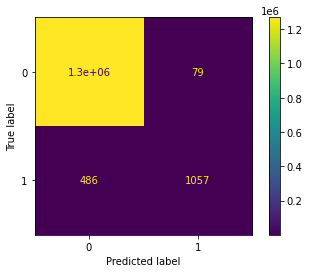

In [142]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve
cm = confusion_matrix(ytest, preds, labels=mdl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mdl.classes_)
disp.plot()
plt.show()

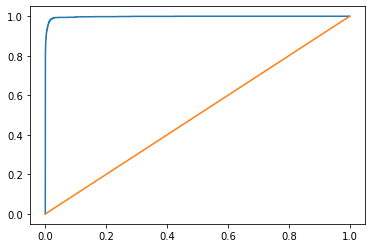

In [165]:
fpr, tpr, thresh = roc_curve(ytest,mdl.decision_function(Xtest))
f, ax = plt.subplots(1)
ax.plot(fpr,tpr)
ax.plot([0,1])

In [161]:
mdl.decision_function(Xtest)

array([-0.20610587, -0.0194693 , -0.12972668, ..., -0.13121076,
       -0.04234628, -0.04238044])

In [3]:
data

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,deltaBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,prevStep
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0.00,0,0,0,1,0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0.00,0,0,0,1,0,1.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0.00,0,0,0,0,1,1.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,-21182.00,0,1,0,0,0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0.00,0,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6351188,699,TRANSFER,162326.52,C1557504343,162326.52,0.00,C404511346,0.00,0.00,1,0.00,0,0,0,0,1,699.0
6351189,699,CASH_OUT,162326.52,C1532317723,162326.52,0.00,C446134087,0.00,162326.52,1,162326.52,0,1,0,0,0,699.0
6351190,699,TRANSFER,2763398.31,C577803442,2763398.31,0.00,C619602282,0.00,0.00,1,0.00,0,0,0,0,1,699.0
6351191,699,CASH_OUT,2763398.31,C1491503658,2763398.31,0.00,C454424230,339515.35,3102913.66,1,2763398.31,0,1,0,0,0,699.0


In [5]:
data.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,deltaBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,prevStep
count,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06
mean,2.425553e+02,1.798155e+05,8.347957e+05,8.561696e+05,1.101043e+06,1.225372e+06,1.215047e-03,1.243294e+05,2.199374e-01,3.516456e-01,6.504290e-03,3.381777e-01,8.373498e-02,2.425552e+02
std,1.410676e+02,6.036310e+05,2.889959e+06,2.926073e+06,3.398924e+06,3.674293e+06,3.483635e-02,8.133581e+05,4.142040e-01,4.774840e-01,8.038647e-02,4.730894e-01,2.769900e-01,1.410676e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.306083e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,1.338829e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.550000e+02
50%,2.380000e+02,7.486483e+04,1.415300e+04,0.000000e+00,1.330865e+05,2.149190e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.380000e+02
75%,3.340000e+02,2.087152e+05,1.073460e+05,1.443651e+05,9.438661e+05,1.112791e+06,0.000000e+00,1.491298e+05,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.340000e+02
max,6.990000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.056878e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.990000e+02
